# 메트로폴리스의 개선
 기존 메트로 폴리스와 Newman코드의 차이점
 
	- 메트로폴리스 샘플링 구현 :
    	- 격자 상의 각 스핀 위치를 무작위로 선택하여 뒤집고, 에너지 차이를 계산한 후, 이를 기반으로 스핀을 수용하거나 거부하는 과정을 반복한다.
	- 효율적인 에너지 계산:
    	- 에너지 계산을 효율적으로 하기 위해, 새로운 상태가 제안될 때마다 클러스터에 속하는 모든 스핀의 에너지만 계산한다.
    	- 이는 전체 격자의 에너지를 계산하는 것보다 훨씬 더 빠르게 수행될 수 있다.

E_list: [-2.556, -4.716, -18.256, -10.1, -44.032, -47.24, -48.52, -49.84, -49.544, -50.0]
spin_list: [-0.05448000000000002, 0.1060000000000001, 0.5239199999999989, 0.11768000000000034, -0.9230399999999979, -0.9715199999999988, -0.9849599999999988, -0.9983999999999994, -0.9954399999999977, -1.0]


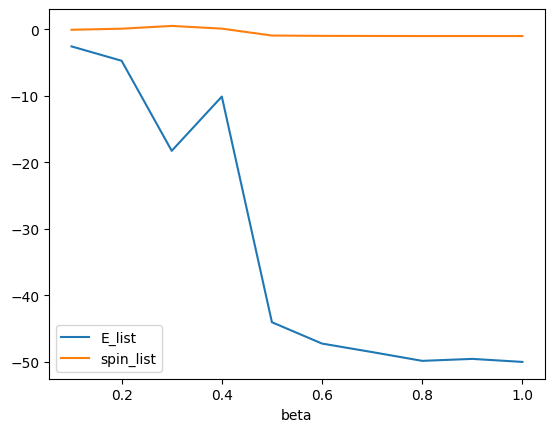

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt

def neighbor(L, N):
    neighbor_point = []

    x = N % L
    y = N // L

    if x == 0:
        temp_x = x + L - 1
        temp_y = y
        neighbor_point.append([temp_x, y])
    else:
        neighbor_point.append([x - 1, y])

    if x == L - 1:
        temp_x = x - L + 1
        temp_y = y
        neighbor_point.append([temp_x, y])
    else:
        neighbor_point.append([x + 1, y])

    if y == 0:
        temp_x = x
        temp_y = (L - 1)
        neighbor_point.append([x, temp_y])
    else:
        neighbor_point.append([x, y - 1])

    if y == L - 1:
        temp_x = x
        temp_y = 0
        neighbor_point.append([x, temp_y])
    else:
        neighbor_point.append([x, y + 1])

    return neighbor_point

def energy(L, A) : #L : 행의 갯수, A: 행렬 이름
    E = 0
    for i in range(L ** 2) :
        target_x = i % L
        target_y = i // L

        for i in neighbor(L, i) :
            if A[target_x][target_y] == A[i[0]][i[1]] :
                E -= 1
            else :
                E += 1
    E = E/2
    # print(E) # double count 문제 해결하기 위해 "/2"함
    return E


L = 5
n = 1000
beta = np.linspace(0.1, 1.0, 10)

S = np.random.randint(0, 2, (L, L)) * 2 - 1
S[0][0] = +1
E_list = []
spin_list = []

for temp_beta in beta:
    avg_energy = 0
    avg_spin = 0
    for _ in range(n):
        U = S.copy()
        random_row = np.random.randint(0, L)
        random_col = np.random.randint(0, L)
        U[random_row, random_col] *= -1  # 스핀을 뒤집음

        temp_sum = 0
        for i,j in neighbor(L, random_row * L + random_col) :
            temp_sum += S[i][j]
        delta_E = 2 * S[random_row][random_col] * temp_sum

        avg_delta += abs(delta_E)

        if delta_E <= 0 or np.random.random() < np.exp(-temp_beta * delta_E):
            S = U

        avg_energy += energy(L, S)
        avg_spin += np.sum(S) / (L ** 2)

    avg_energy /= n
    avg_spin /= n
    E_list.append(avg_energy)
    spin_list.append(avg_spin)

print('E_list:', E_list)
print('spin_list:', spin_list)

plt.plot(beta, E_list, label = 'E_list')
plt.plot(beta, spin_list, label = 'spin_list')
plt.xlabel('beta')
plt.legend()
plt.show()